<div class = "alert alert-block alert-warning">
    
    
    
### Приоритизация гипотез и анализ A/B теста в интернет-магазине.
    
На данном этапе исследования представлены таблица с информацией о 9 гипотезах по увеличению выручки интернет-магазина с указанным параметрами Reach, Impact, Confidence, Effort; таблица со всей необходимой информацией о заказах интернет-магазина; таблица с данными о количестве пользователей в указанную дату в указанной группе A/B теста.
<div class = "alert alert-block alert-success">
Данное исследование разделим на несколько частей:
    <p></p>
<p><b>Шаг 1.Изучение общей информации:</b></p>
    <p>Изучение файлов с данными, получение общей информации</p>
<p><b>Шаг 2.Предобработка данных:</b></p>
    <p>Подготовка данных к анализу.</p>
<p><b>Шаг 3.Приоритизация гипотез:</b></p>
    <p>Выявление наиболее подходящих гипотез при помощи использования фреймворков ICE и RICE.</p>
<p><b>Шаг 4.Анализ A/B теста:</b></p>
    <p>Провести анализ A/B теста и принять решение по его результатам.</p>
<p><b>Шаг 5.Вывод:</b></p>
    <p>Формулировка вывода.</p>

<div class = "alert alert-block alert-success">
    
    
### Изучение общей информации:
    
    
    

In [36]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import scipy.stats as stats
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
hypotheses = pd.read_csv('/datasets/hypothesis.csv')
print('Таблица "hypotheses":')
display(hypotheses)
print(hypotheses.info())
orders = pd.read_csv('/datasets/orders.csv')
print('Таблица "orders":')
display(orders.head())
print(orders.info())
visitors = pd.read_csv('/datasets/visitors.csv')
print('Таблица "visitors":')
display(visitors.head())
print(visitors.info())

Таблица "hypotheses":


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
Таблица "orders":


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Таблица "visitors":


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Были показаны таблицы с помощью функции print(). Была показана основная информация о таблицах с помощью метода info() для выявления возможных ошибок в типах столбцов и количестве строк.

<div class = "alert alert-block alert-success">
    
    
### Предобратка данных:
    
    
    

In [37]:
hypotheses = hypotheses.rename(columns = {'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'})
print(hypotheses.info())
orders = orders.rename(columns = {'transactionId':'transaction_Id', 'visitorId':'visitor_Id'})
orders['date'] = pd.to_datetime(orders['date'])
orders = orders.drop_duplicates().reset_index(drop = True)
print(orders.info())
visitors['date'] = pd.to_datetime(visitors['date'])
visitors = visitors.drop_duplicates().reset_index(drop = True)
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_Id    1197 non-null int64
visitor_Id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


Тип данных в столбцах с датами были изменены на тип 'datetime'. Названия столбцов в таблицах были изменены для более удобной работы с ними.

<div class = "alert alert-block alert-success">
    
    
### Приоритизация гипотез:
    
    
    

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


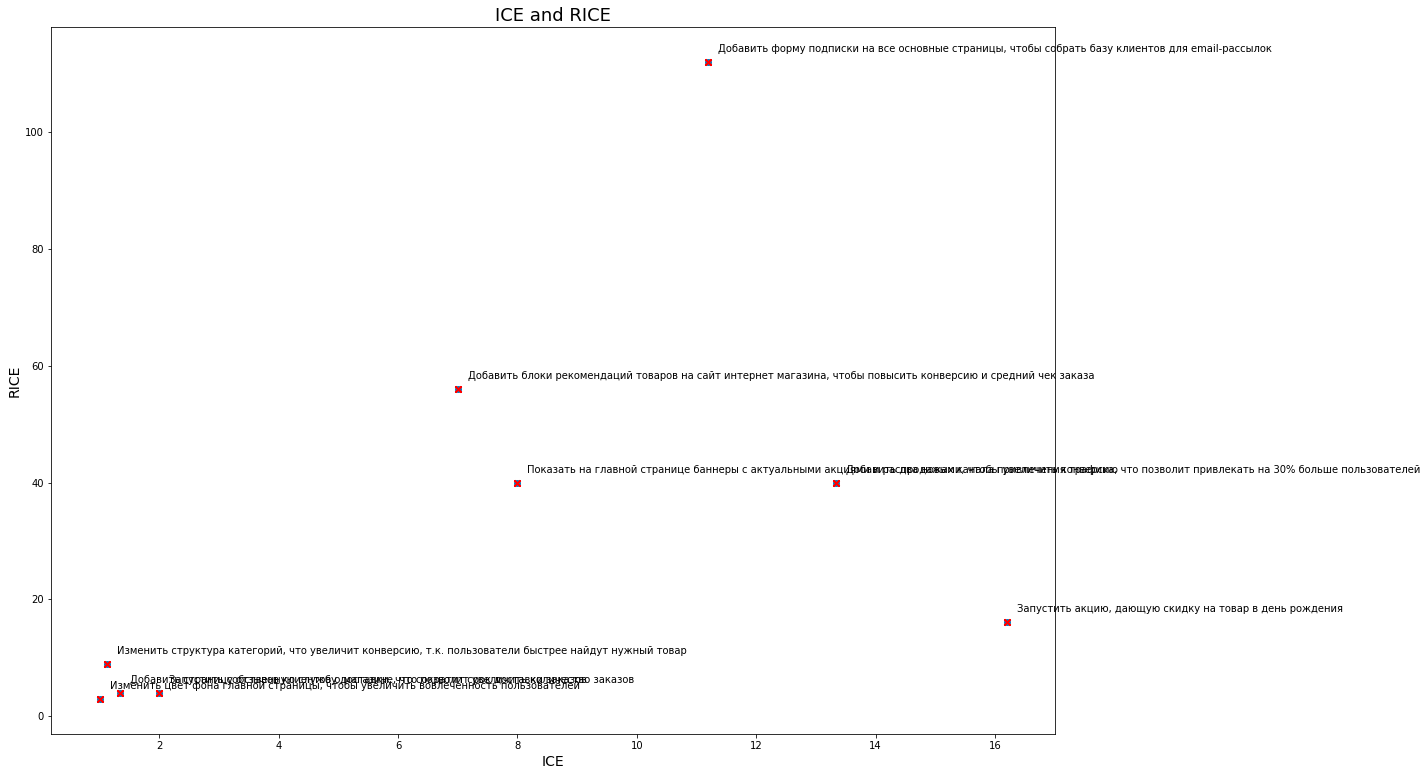

In [38]:
hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts']
display(hypotheses.sort_values(by = 'ICE', ascending = False))
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts']
display(hypotheses.sort_values(by = 'RICE', ascending = False))

x = hypotheses['ICE'].values
y = hypotheses['RICE'].values
types = hypotheses.reset_index()['hypothesis'].values
fig, ax = plt.subplots(figsize=(18,13))
ax.scatter(x, y)
ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE and RICE', fontsize=18)
for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

<p>Для выявления самых подходящих для нас гипотез были применены одни из самых популярных способов приоритизации задач: ICE и RICE. После применения фреймворка "ICE" наиболее подходящими гипотезами оказались:</p>
<p>Запустить акцию, дающую скидку на товар в день.</p>
<p>Добавить два новых канала привлечения трафика.</p>
<p>Добавить форму подписки на все основные страницы.</p>
<p> После применения фреймворка "RICE" наиболее подходящими гипотезами оказались:</p>
<p>Добавить форму подписки на все основные страницы.</p>
<p>Добавить блоки рекомендаций товаров на сайт.</p>
<p>Добавить два новых канала привлечения трафика.</p>
<p>Видно, что приоритизированные гипотезы при использовании  фреймворков ICE и RICE различаются.Это связано с тем, что при применении фреймворка "RICE" мы учитывали также то, сколько пользователей затронет изменение, которое мы хотим внести.</p>
<p>Также стоит отметить то, что самой неподходящей при использовании двух разных фреймворков осталась гипотеза - "Изменить цвет фона главной страницы."</p>

<div class = "alert alert-block alert-success">
    
    
### Анализ A/B теста:
    
    
    

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


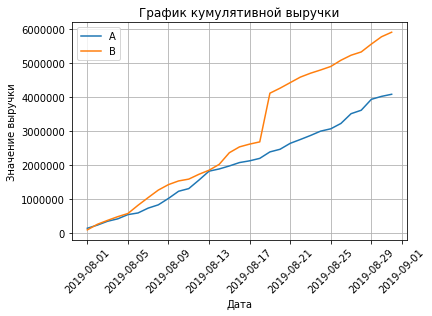

<Figure size 720x360 with 0 Axes>

In [39]:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_Id', 'visitor_Id', 'revenue']].groupby('date', as_index = False).agg({'transaction_Id':pd.Series.nunique, 'revenue':'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
display(ordersADaily.head())
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date']<=x['date']].agg({'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}), axis = 1).sort_values(by = ['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_Id', 'visitor_Id', 'revenue']].groupby('date', as_index = False).agg({'transaction_Id':pd.Series.nunique, 'revenue':'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date']<=x['date']].agg({'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}), axis = 1).sort_values(by = ['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
display(ordersACummulative.head())
display(ordersBCummulative.head())
fig, test = plt.subplots()
test.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'], label = 'A')
test.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB'], label = 'B')
test.set_title('График кумулятивной выручки')
test.set_xlabel('Дата')
test.set_ylabel('Значение выручки')
test.grid()
test.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(10, 5))
plt.show()

На графике кумулятивной выручки видно, что кумулятивная выручка группы B почти всегда была больше кумулятивной выручки из группы A, а если в какое-то время не больше, то равна ей.

,date,ordersCummulativeA,revenueCummulativeA,revenuePerUserA
0,2019-08-01,24,148579,6190.791667
1,2019-08-02,44,242401,5509.113636
2,2019-08-03,68,354874,5218.735294
3,2019-08-04,84,425699,5067.845238
4,2019-08-05,109,549917,5045.110092


,date,ordersCummulativeB,revenueCummulativeB,revenuePerUserB
0,2019-08-01,21,101217,4819.857143
1,2019-08-02,45,266748,5927.733333
2,2019-08-03,61,380996,6245.836066
3,2019-08-04,78,489567,6276.500000
4,2019-08-05,101,581995,5762.326733


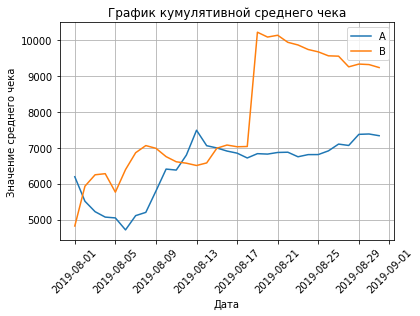

<Figure size 720x360 with 0 Axes>

In [40]:
ordersACummulative['revenuePerUserA'] = ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA']
ordersBCummulative['revenuePerUserB'] = ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB']
display(ordersACummulative.head())
display(ordersBCummulative.head())
fig, test = plt.subplots()
test.plot(ordersACummulative['date'], ordersACummulative['revenuePerUserA'], label = 'A')
test.plot(ordersBCummulative['date'], ordersBCummulative['revenuePerUserB'], label = 'B')
test.set_title('График кумулятивной среднего чека')
test.set_xlabel('Дата')
test.set_ylabel('Значение среднего чека')
test.grid()
test.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(10, 5))
plt.show()

По графику кумулятивного среднего чека можно сказать, что средний чек группы B был почти всегда опять-таки больше среднего чека группы A.

No handles with labels found to put in legend.


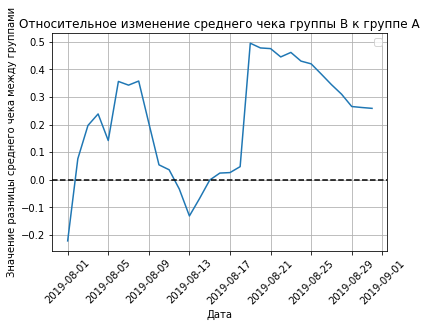

<Figure size 720x360 with 0 Axes>

In [41]:
mergedCummulativeRevenue = ordersACummulative.merge(ordersBCummulative, left_on = 'date', right_on = 'date',how = 'left', suffixes = ['A', 'B'])
fig, test = plt.subplots()
test.plot(mergedCummulativeRevenue['date'], (ordersBCummulative['revenuePerUserB']/ordersACummulative['revenuePerUserA'] - 1))
plt.axhline(y = 0, color = 'black', linestyle = '--')
test.set_title('Относительное изменение среднего чека группы B к группе A')
test.set_xlabel('Дата')
test.set_ylabel('Значение разницы среднего чека между группами')
test.grid()
test.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(10, 5))
plt.show()

Значение, характеризующее относительное изменение кумулятивного среднего чека группы B к группе A и изменяющееся по месяцам - за исключением 2 месяцев, было больше 0. Максмально большая разница между средним чеком группы B к среднему чеку группы A равна 50 %.

,transaction_Id,visitor_Id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,transaction_Id,visitor_Id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


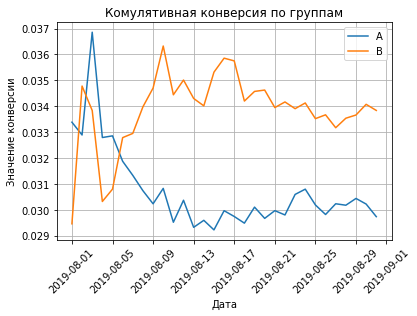

<Figure size 720x360 with 0 Axes>

In [42]:
display(orders.head())
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_Id' : pd.Series.nunique, 'visitor_Id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(ordersAggregated.head())
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
fig, test = plt.subplots()
test.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
test.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
test.set_title('Комулятивная конверсия по группам')
test.set_xlabel('Дата')
test.set_ylabel('Значение конверсии')
test.grid()
test.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(10, 5))
plt.show()

Значительно большую часть времени конверсия группы B была больше конверсии группы A.

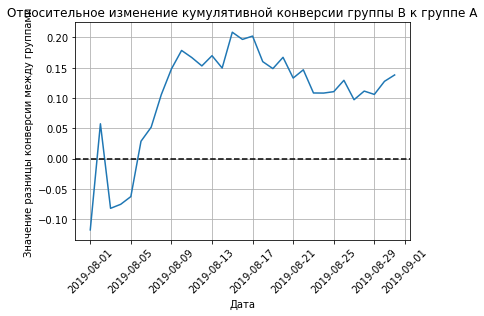

<Figure size 720x360 with 0 Axes>

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig, test = plt.subplots()
test.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1))
plt.axhline(y = 0, color = 'black', linestyle = '--')
test.set_title('Относительное изменение кумулятивной конверсии группы B к группе A')
test.set_xlabel('Дата')
test.set_ylabel('Значение разницы конверсии между группами')
test.grid()
plt.xticks(rotation=45)
plt.figure(figsize=(10, 5))
plt.show()

График различия конверсий группы B и A показал, что сначала значение, обозначающее конверсию группы B, начало быстро расти, достигнув разницы в 5%, но потом почти сразу упало с разницей в почти 10% относительно группы A. Однако потом значение, характеризующее разницу конверсии группы B относительно группы A, было лишь больше нуля, достигнув максимума, равного 20%. Сейчас значение показывает стабильность и оно всегда больше 0.

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
display(visitorsADaily.head())
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
display(visitorsACummulative.head())
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
display(visitorsBDaily.head())
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
display(visitorsBCummulative.head())

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Были построены таблицы с кумулятивными числами посещений по дням в разных группах.

In [45]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,revenuePerUserA,ordersCummulativeB,revenueCummulativeB,revenuePerUserB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,6190.791667,21,101217,4819.857143,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,5509.113636,45,266748,5927.733333,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,5218.735294,61,380996,6245.836066,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,5067.845238,78,489567,6276.500000,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,5045.110092,101,581995,5762.326733,756,707,3318,3280


Были соединены таблицы с информацией о количестве заказов в день в группах A и B, о кумулятивном количестве заказов в группах A и B, о количестве посещений в день в группая A и B, о кумулятивном количестве посещений по дням в группах A и B.

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


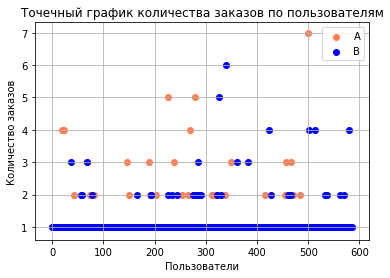

<Figure size 1080x720 with 0 Axes>

In [46]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_Id', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_Id', as_index=False).agg({'transaction_Id': pd.Series.nunique})
ordersByUsersA.columns = ['user_Id', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_Id', as_index=False).agg({'transaction_Id': pd.Series.nunique})
ordersByUsersB.columns = ['user_Id', 'orders'] 
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
fig, test = plt.subplots()
x_values_A = pd.Series(range(0,len(ordersByUsersA['orders'])))
x_values_B = pd.Series(range(0,len(ordersByUsersB['orders'])))
test.scatter(x_values_A, ordersByUsersA['orders'], c = 'coral', label = 'A') 
test.scatter(x_values_B, ordersByUsersB['orders'], c = 'blue', label = 'B')
test.set_title('Точечный график количества заказов по пользователям')
test.set_xlabel('Пользователи')
test.set_ylabel('Количество заказов')
plt.savefig('ScatterPlot_05.png')
test.grid()
test.legend()
plt.figure(figsize=(15, 10))
plt.show()

Был построен точечный график количества заказов по пользователям, который показал, что что чаще всего посетители интернет-магазина заказывают в нем что-то 1 раз, потом 2, 3. Редко, когда бывают 4 или 5 заказов. Самыми выбивающимися оказались 8, 9 заказов и количество заказов больше 10.

In [47]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))
print('Выберем граничную точку, равную: 3')

[2. 4.]
Выберем граничную точку, равную: 3


Расчет 95 и 99 перцентили количества заказов на пользователя дал понять о том, что 95 % пользователей сделало заказов, не больше 2 и 99 % пользователей - заказов, не больше 4. По итогам этих данных была выбрана граничная точка, равная 3.

,transaction_Id,visitor_Id,date,revenue,group,new_revenue
0,3667963787,3312258926,2019-08-15,1650,B,1650.0
1,2804400009,3642806036,2019-08-15,730,B,730.0
2,2961555356,4069496402,2019-08-15,400,A,400.0
3,3797467345,1196621759,2019-08-15,9759,B,9759.0
4,2282983706,2322279887,2019-08-15,2308,B,2308.0


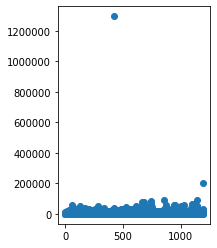

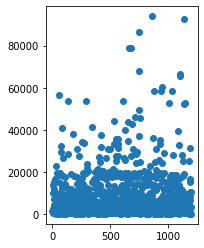

In [78]:
orders['new_revenue'] = orders[orders['revenue'] < 100000]['revenue']
display(orders.head())
fig, test = plt.subplots()
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['revenue'])
test.set_title('Точечный график стоимостей заказов')
test.set_xlabel('Пользователи')
test.set_ylabel('Стоимость продукции')
test.grid()
plt.show()

fig, test = plt.subplots()
x_values = pd.Series(range(0,len(orders['new_revenue'])))
plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['new_revenue'])
test.set_title('Точечный график стоимостей заказов')
test.set_xlabel('Пользователи')
test.set_ylabel('Стоимость продукции')
test.grid()
plt.show()

Точечный график стоимости заказов показал, что, в основном, пользователи покупают продукцию, не дороже 100000 рублей. Выбивающимися значениями по графику оказались значения, близкие к 200000 рублей и то, что больше, чем 1200000 рублей.

In [49]:
print(np.percentile(orders['revenue'], [95, 99])) 
print('Граничная стоимость заказов равна: 28000')

[28000.  58233.2]
Граничная стоимость заказов равна: 28000


Расчёт 95 и 99 перцентилей стоимости заказов дал понять то, что 95 % пользователей покупают продукцию, не дороже 28000 рублей, и 99 % - не дороже 58233 рублей. По итогам этих данных была выбрана граничная стоимость заказов, равная 28000 рублей.

In [52]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
display(sampleA.head())
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
display(sampleB.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Чтобы подготовить выборки к проверки критерием Манна-Уитни в переменных sampleA и sampleB посчитаем количество заказов у каждого пользователя, тем, кто ничего не заказал будут соответствовать нули.

In [61]:
print('Ho: разницы в конверсиях у групп A и B нет')
print('H1: конверсия в группе A меньше конверсии в группе B')
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB, True, 'less')
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гиптезу, вывод о различии сделать нельзя')
print('Статистическая значимость различий в конверсии между группами по "сырым" данным:')
print("{0:.3f}".format(results[1]))

Ho: разницы в конверсиях у групп A и B нет
H1: конверсия в группе A меньше конверсии в группе B
p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима
Статистическая значимость различий в конверсии между группами по "сырым" данным:
0.008


Статистическая значимость различий в конверсии между группами по "сырым" данным равна 0.008. Это число меньше, чем 0.05, что означает, что конверсия в группе B больше конверсии в группе A.

In [63]:
print('Ho: разницы в среднем чеке у групп A и B нет')
print('H1: средний чек в группе A меньше среднего чека в группе B')
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'less')
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гиптезу, вывод о различии сделать нельзя')
print('Статистическая значимость различий в среднем чеке между группами по "сырым" данным:')
print("{0:.3f}".format(results[1]))

Ho: разницы в среднем чеке у групп A и B нет
H1: средний чек в группе A меньше среднего чека в группе B
p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гиптезу, вывод о различии сделать нельзя
Статистическая значимость различий в среднем чеке между группами по "сырым" данным:
0.365


Статистическая значимость различий в среднем чеке по "сырым" данным больше 0.05 и равна 0.365, а это значит, что разницы в средних чеках у групп A и B нет.

In [64]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['user_Id'], ordersByUsersB[ordersByUsersB['orders'] > 3]['user_Id']],axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_Id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
(63,)


Был создан список из пользователей с отличающимися данными. Туда были включены покупатели с заказами больше, чем 3 и со стоимостью заказов больше 28000.

In [66]:
sampleAFiltered = pd.concat(
[
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_Id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_Id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('Ho: разницы в конверсиях у очищенных групп A и B нет')
print('H1: конверсия в очищенной группе A меньше конверсии в очищенной от выбивающихся значений в группе B')
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'less')
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гиптезу, вывод о различии сделать нельзя')
print('Статистическая значимость различий в конверсии между группами по "очищенным" данным:')
print("{0:.3f}".format(results[1]))

Ho: разницы в конверсиях у очищенных групп A и B нет
H1: конверсия в очищенной группе A меньше конверсии в очищенной от выбивающихся значений в группе B
p-значение:  0.008971444295776253
Отвергаем нулевую гипотезу: разница статистически значима
Статистическая значимость различий в конверсии между группами по "очищенным" данным:
0.009


Из таблицы с количеством заказов для каждого пользователя были исключены выбивающиеся значения и тогда статистическая значимость стала равна 0.009, что меньше, чем 0.05 - конверсия в очищенной группе A меньше конверсии в очищенной от выбивающихся значений в группе B.

In [67]:
print('Ho: разницы в среднем чеке у очищенных групп A и B нет')
print('H1: средний чек в группе A, очищенной от выбивающихся значений, меньше среднего чека в группе B, очищенной от выбивающихся значений')
alpha = 0.05
results = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_Id'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_Id'].isin(abnormalUsers)))]['revenue'], True, 'less')
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гиптезу, вывод о различии сделать нельзя')
print('Статистическая значимость различий в среднем чеке между группами по "сырым" данным:')
print("{0:.3f}".format(results[1]))

Ho: разницы в среднем чеке у очищенных групп A и B нет
H1: средний чек в группе A, очищенной от выбивающихся значений, меньше среднего чека в группе B, очищенной от выбивающихся значений
p-значение:  0.5118143568610138
Не получилось отвергнуть нулевую гиптезу, вывод о различии сделать нельзя
Статистическая значимость различий в среднем чеке между группами по "сырым" данным:
0.512


Из таблицы orders были исключены пользователи с выбивающейся стоимостью заказов и тогда статистическая значимость различий в среднем чеке заказов стала равна 0.512, что больше чем предыдущее значение, равное 0.365. Разницы в среднем чеке у очищенных групп A и B нет.

<div class = "alert alert-block alert-success">
<b>Выводы:</b>
    <p></p>
<p>По результатам всех предыдущих исследований примем следующее решение - останавливаем тест, зафиксировав победу группы B, потому что:</p>
<p>1.Кумулятивная выручка группы B почти всегда была больше кумулятивной выручки группы A.</p>
<p>2.Средний чек группы B в большую часть времени был больше среднего чека группы A; относительное изменение кумулятивного среднего чека группы B к группе A, за исключением 2 месяцев, было больше 0. Максимальная разница достигает 50 %.</p>
<p>3.Значительно большую часть времени конверсия группы B была больше конверсии группы A, максимальная разница достигает 20 %.</p>
<p>4.После вычета выбивающихся значений получилось, что разницы в среднем чеке у очищенных групп A и B нет; конверсия в очищенной группе A меньше конверсии в очищенной от выбивающихся значений в группе B.</p>